Стоп слова, лемматизатор:

In [1]:
import numpy as np
import pandas as pd
import pymorphy2 as pm2
import re
import nltk
nltk.download("stopwords")
#--------#
from nltk.corpus import stopwords

#Create lemmatizer and stopwords list
russian_stopwords = stopwords.words("russian")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\1255971\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Данные:

In [2]:
data = pd.read_csv('jaguar.csv')
pmm = pm2.MorphAnalyzer()

Удаление стоп слов и лемматизация:

In [3]:
def parse(text):
    text = re.sub(r'[^\w\s]','',text)
    text = [pmm.normal_forms(x)[0] for x in text.split() if x not in russian_stopwords]
    return text

Очищенный текст:

In [4]:
cleaned_text = data['body'].apply(parse)

In [5]:
len(cleaned_text)

50

In [6]:
from gensim.models import Word2Vec

C:\Users\1255971\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
C:\Users\1255971\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [7]:
model = Word2Vec(cleaned_text, size=50, window=5, min_count=1, iter=10)
model.init_sims(replace = True)
model.save("word2vec.model")

In [8]:
voc = model.wv.vocab

In [9]:
words = [i for i in voc]

In [10]:
sort_words=sorted(words)

In [11]:
sort_words

['0',
 '000',
 '011',
 '0300',
 '033',
 '0600',
 '068',
 '075',
 '076',
 '1',
 '10',
 '100',
 '1000',
 '10000',
 '1004',
 '1012',
 '105',
 '10ть',
 '110',
 '112',
 '112185',
 '112litre',
 '115',
 '115сильный',
 '12',
 '120',
 '120170',
 '1216',
 '126',
 '129',
 '12litre',
 '12цилиндровый',
 '13',
 '136',
 '14',
 '142432',
 '142700',
 '145',
 '15',
 '15000',
 '150180',
 '1532',
 '1540ха',
 '158',
 '16',
 '160',
 '1600ха',
 '16hp',
 '170039',
 '18',
 '180сильный',
 '1830',
 '185',
 '19',
 '190',
 '1900',
 '1922',
 '1925',
 '1926',
 '1927',
 '192сильный',
 '193',
 '1931',
 '1932',
 '1936',
 '1940ха',
 '1945',
 '1948',
 '1949',
 '1950',
 '1954',
 '1957',
 '1960',
 '1961',
 '1962',
 '1966',
 '1968',
 '1972',
 '1973',
 '1978',
 '1981',
 '1983',
 '1987',
 '1988',
 '1989',
 '1991',
 '199194',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1998',
 '1ой',
 '2',
 '20',
 '2000',
 '2000ха',
 '2001',
 '2003',
 '2003го',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2030',
 '20hp',
 '20х',


In [12]:
#TF-IDF

In [13]:
smth = cleaned_text.tolist()

In [14]:
arr =[]
for i in smth:
    string = ' '.join(i)
    arr.append(string)

In [15]:
print (arr)

['ягуар panthera onca вид хищный млекопитающее семейство кошачий четыре представитель род пантера лата panthera который относиться подсемейство больший кошка единственный представитель род территория северный южный америка три размер мир самый крупный новый свет представитель семейство кошачий ареал вид простираться мексика юг парагвай север аргентина длина тело хвост 112185 сантиметр хвост 4575 сантиметр масса 36113 килограмм основное 6090 килограмм отдельный случай 120 килограмм рекорд природа составлять 158 килограмм самка 20 маленький лёгкий обычный нормальный взрослый самец крупный подвид весить около 90110 килограмм среднее около 9095 килограмм самка 6080 килограмм высота холка составлять 6376 сантиметр внешне ягуар очень похожий леопард значительно превосходить размер самый крупный ягуар обитать бразильский штат матугроса в зона обитание ягуар поиспански называться разный otorongo jaguar yaguareté yaguar onza tigre tigre americano мексиканец называть язык науатль ocelotl ошибочн

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(arr).todense()
matrix = pd.DataFrame(matrix, columns=vectorizer.get_feature_names())


In [29]:
tf = np.empty((0,50), float)
for word in sort_words:
    w2v = np.array(model.wv[word])
    if word in matrix:
        ti = np.array(matrix[word].tolist())
        new = w2v*ti
        tf = np.append(tf, [new], axis = 0)
    else:
        sort_words.remove(word)


(3908, 50)


In [51]:
import scipy.spatial.distance

In [52]:
pairs = scipy.spatial.distance.pdist(tf)

In [57]:
pairs = pairs.reshape(1,-1)

In [64]:
from matplotlib import pyplot

In [61]:
from scipy.cluster.hierarchy import  ward, dendrogram

linkage_matrix = ward(tf) 

C:\Users\1255971\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


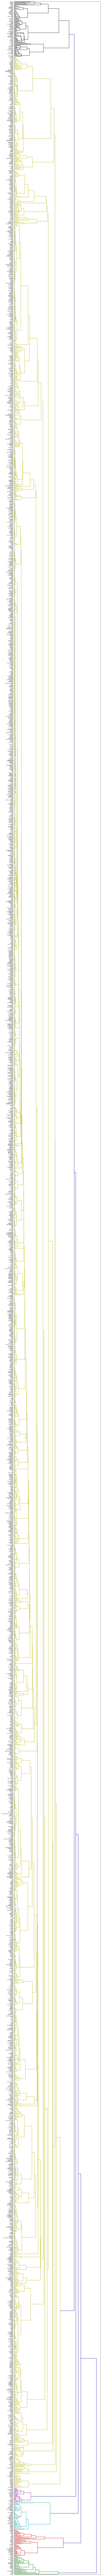

In [65]:
fig, ax = pyplot.subplots(figsize=(10, 250)) 
ax = dendrogram(linkage_matrix, orientation="right", labels=sort_words);

pyplot.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

pyplot.tight_layout() 

pyplot.savefig('w2v_clusters.png', dpi=200)